In [1]:
%run C:/Users/MohammedSB/Desktop/projects/Hypertension/Requirements.ipynb

In [2]:
# Seed
set_seed(0)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
PATH = r"D:\\MohammedSB\Fundus\\"
CSV_PATH = {"HTNPath": PATH + r"HTN", "NonHTNPath": PATH + "NonHTN"}

In [5]:
train_set, test_set = get_datasets(val=False)

In [6]:
train_transform = T.Compose([
    T.Resize((500, 500)),
    T.ToTensor(),
    T.RandomHorizontalFlip(0.5),
    T.RandomRotation(degrees=(0, 360)),
    T.GaussianBlur(5),
    T.Normalize(mean=[0.3675, 0.1760, 0.1047], std=[0.2289, 0.1180, 0.0748]),
])

test_transform = T.Compose([
    T.Resize((500, 500)),
    T.ToTensor(),
    T.Normalize(mean=[0.3675, 0.1760, 0.1047], std=[0.2289, 0.1180, 0.0748]),
])

train_dataset = HypertensionDataset(CSV_PATH, train_set, train_transform=train_transform)
test_dataset = HypertensionDataset(CSV_PATH, test_set, test_transform=test_transform)

train_loader, test_loader = train_test_loader(train_dataset, test_dataset, batch_size=8)

# val_dataset = HypertensionDataset(CSV_PATH, val_set, test_transform=test_transform)
# val_loader = DataLoader(val_dataset, batch_size=8)

In [7]:
mlp = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=8, out_features=32),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=32, out_features=64),
)

cnn = get_densenet201(device=device, freeze=True, with_mlp=True, outputs=64)

fm = nn.Sequential(
    nn.Linear(in_features=128, out_features=256),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=256, out_features=512),
    nn.ReLU(inplace=True),
    nn.Dropout(),
    nn.Linear(in_features=512, out_features=256),
    nn.ReLU(inplace=True),
    nn.Dropout(),
    nn.Linear(in_features=256, out_features=128),
    nn.ReLU(inplace=True),
    nn.Dropout(),
    nn.Linear(in_features=128, out_features=32),
    nn.ReLU(inplace=True),
    nn.Dropout(),
    nn.Linear(in_features=32, out_features=8),
    nn.ReLU(inplace=True),
    nn.Dropout(),
    nn.Linear(in_features=8, out_features=1),
)

mlp, cnn, fm = mlp.to(device).float(), cnn.to(device).float(), fm.to(device).float()

In [8]:
models = {
    "image_model": cnn,
    "tabular_model": mlp,
    "fusion_model": fm
}

early_stop = {
    "patience": 5,
    "min_delta": 0.001,
    "multip": 5,
}

optimizer = torch.optim.Adam([
    {'params': cnn.parameters(), 'lr': 1e-4},
    {'params': mlp.parameters(), 'lr': 1e-4},
    {'params': fm.parameters(), 'lr': 1e-4}],
)

criterion = nn.BCEWithLogitsLoss()

In [9]:
epochs = 200
metrics = train_val(epochs=epochs, models=models, criterion=criterion, optimizer=optimizer, train_loader=train_loader,
                    val_loader=test_loader, device=device, early_stop=early_stop)

Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Beginning Training: 

Epoch 1/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.697415,    Accuracy: 51.48%,    Correct Counter: 471/915,    F1 Score: 0.00,    Precision: 1.00,    Recall:  0.00 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.698975,    Accuracy: 50.44%,    Correct Counter: 115/228,    F1 Score: 0.00,    Precision: 1.00,    Recall:  0.00 

Epoch 2/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.696797,    Accuracy: 51.48%,    Correct Counter: 471/915,    F1 Score: 0.00,    Precision: 1.00,    Recall:  0.00 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.698316,    Accuracy: 50.44%,    Correct Counter: 115/228,    F1 Score: 0.00,    Precision: 1.00,    Recall:  0.00 

Epoch 3/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.695914,    Accuracy: 51.48%,    Correct Counter: 471/915,    F1 Score: 0.00,    Precision: 1.00,    Recall:  0.00 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.697333,    Accuracy: 50.44%,    Correct Counter: 115/228,    F1 Score: 0.00,    Precision: 1.00,    Recall:  0.00 

Epoch 4/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.695171,    Accuracy: 51.69%,    Correct Counter: 473/915,    F1 Score: 0.05,    Precision: 0.55,    Recall:  0.03 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.693486,    Accuracy: 50.44%,    Correct Counter: 115/228,    F1 Score: 0.00,    Precision: 1.00,    Recall:  0.00 

Epoch 5/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.695545,    Accuracy: 51.26%,    Correct Counter: 469/915,    F1 Score: 0.02,    Precision: 0.40,    Recall:  0.01 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.692602,    Accuracy: 50.44%,    Correct Counter: 115/228,    F1 Score: 0.00,    Precision: 1.00,    Recall:  0.00 

Epoch 6/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.685429,    Accuracy: 54.97%,    Correct Counter: 503/915,    F1 Score: 0.33,    Precision: 0.60,    Recall:  0.23 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.675348,    Accuracy: 64.91%,    Correct Counter: 148/228,    F1 Score: 0.72,    Precision: 0.59,    Recall:  0.93 

Epoch 7/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.678135,    Accuracy: 58.58%,    Correct Counter: 536/915,    F1 Score: 0.47,    Precision: 0.62,    Recall:  0.37 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.662714,    Accuracy: 70.61%,    Correct Counter: 161/228,    F1 Score: 0.73,    Precision: 0.67,    Recall:  0.80 

Epoch 8/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.670363,    Accuracy: 65.79%,    Correct Counter: 602/915,    F1 Score: 0.60,    Precision: 0.70,    Recall:  0.52 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.656522,    Accuracy: 65.79%,    Correct Counter: 150/228,    F1 Score: 0.71,    Precision: 0.61,    Recall:  0.86 

Epoch 9/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.668860,    Accuracy: 63.72%,    Correct Counter: 583/915,    F1 Score: 0.56,    Precision: 0.68,    Recall:  0.48 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.657119,    Accuracy: 69.74%,    Correct Counter: 159/228,    F1 Score: 0.73,    Precision: 0.65,    Recall:  0.82 

Epoch 10/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.654172,    Accuracy: 63.39%,    Correct Counter: 580/915,    F1 Score: 0.59,    Precision: 0.64,    Recall:  0.55 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.630632,    Accuracy: 70.61%,    Correct Counter: 161/228,    F1 Score: 0.74,    Precision: 0.66,    Recall:  0.86 

Epoch 11/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.619059,    Accuracy: 63.28%,    Correct Counter: 579/915,    F1 Score: 0.58,    Precision: 0.65,    Recall:  0.52 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.601241,    Accuracy: 68.42%,    Correct Counter: 156/228,    F1 Score: 0.70,    Precision: 0.66,    Recall:  0.75 

Epoch 12/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.604398,    Accuracy: 65.68%,    Correct Counter: 601/915,    F1 Score: 0.63,    Precision: 0.66,    Recall:  0.60 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.587766,    Accuracy: 64.91%,    Correct Counter: 148/228,    F1 Score: 0.71,    Precision: 0.60,    Recall:  0.86 

Epoch 13/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.608620,    Accuracy: 66.89%,    Correct Counter: 612/915,    F1 Score: 0.66,    Precision: 0.66,    Recall:  0.65 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.595040,    Accuracy: 66.67%,    Correct Counter: 152/228,    F1 Score: 0.72,    Precision: 0.62,    Recall:  0.86 

Epoch 14/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.604063,    Accuracy: 65.36%,    Correct Counter: 598/915,    F1 Score: 0.64,    Precision: 0.65,    Recall:  0.62 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.600619,    Accuracy: 67.98%,    Correct Counter: 155/228,    F1 Score: 0.73,    Precision: 0.63,    Recall:  0.86 

Epoch 15/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.603512,    Accuracy: 64.26%,    Correct Counter: 588/915,    F1 Score: 0.62,    Precision: 0.64,    Recall:  0.60 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.590658,    Accuracy: 64.91%,    Correct Counter: 148/228,    F1 Score: 0.71,    Precision: 0.60,    Recall:  0.87 

Epoch 16/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.587084,    Accuracy: 64.48%,    Correct Counter: 590/915,    F1 Score: 0.61,    Precision: 0.65,    Recall:  0.57 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.600920,    Accuracy: 65.79%,    Correct Counter: 150/228,    F1 Score: 0.71,    Precision: 0.61,    Recall:  0.86 

Epoch 17/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.602184,    Accuracy: 64.59%,    Correct Counter: 591/915,    F1 Score: 0.62,    Precision: 0.64,    Recall:  0.61 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.600880,    Accuracy: 66.23%,    Correct Counter: 151/228,    F1 Score: 0.72,    Precision: 0.61,    Recall:  0.86 

Epoch 18/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.575056,    Accuracy: 67.43%,    Correct Counter: 617/915,    F1 Score: 0.67,    Precision: 0.66,    Recall:  0.67 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.593117,    Accuracy: 65.35%,    Correct Counter: 149/228,    F1 Score: 0.72,    Precision: 0.60,    Recall:  0.88 

Epoch 19/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.585679,    Accuracy: 65.90%,    Correct Counter: 603/915,    F1 Score: 0.65,    Precision: 0.64,    Recall:  0.66 



Batch in Progress:   0%|                                                    | 0/115 [00:00<?, ?it/s]

Validation Set:
    Average Loss:  0.598120,    Accuracy: 65.35%,    Correct Counter: 149/228,    F1 Score: 0.71,    Precision: 0.60,    Recall:  0.87 

Epoch 20/200


Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Train Set:
    Average Loss:  0.585161,    Accuracy: 64.37%,    Correct Counter: 589/915,    F1 Score: 0.62,    Precision: 0.64,    Recall:  0.60 



Batch in Progress: 100%|████████████████████████████████████████████| 29/29 [00:07<00:00,  4.05it/s]

Validation Set:
    Average Loss:  0.602931,    Accuracy: 65.35%,    Correct Counter: 149/228,    F1 Score: 0.71,    Precision: 0.61,    Recall:  0.86 



In [ ]:
metrics_test = test(models=models, criterion=criterion, test_loader=test_loader, device=device)

Batch in Progress:   0%|                                                     | 0/29 [00:00<?, ?it/s]

Testing: 



Batch in Progress:   7%|███                                          | 2/29 [00:00<00:10,  2.53it/s]

In [11]:
y_true = metrics_test["y_true"].squeeze(1).numpy()
y_prob = metrics_test["y_prob"].squeeze(1).numpy()
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

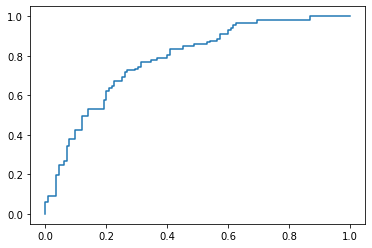

In [12]:
plt.plot(fpr, tpr, label="AUC Curve")

In [13]:
score = auc(fpr, tpr)

In [14]:
score

0.7838399384378608

In [15]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_prob >= 0.5).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

In [16]:
print(f"sensitivity: {sensitivity}")
print(f"specificity: {specificity}")

sensitivity: 0.911504424778761
specificity: 0.40869565217391307


In [22]:
MODELS_PATH = r"C:\Users\MohammedSB\Desktop\projects\Hypertension\models\\"
torch.save(cnn, MODELS_PATH + "cnn.pth")
torch.save(mlp, MODELS_PATH + "mlp.pth")
torch.save(fm, MODELS_PATH + "fm.pth")